#### Pridicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Use any two Machine Learning algorithm to perform same
**preferable ML models**
- Naive Bayes
- Dicision Tree
- Random forest
5. Use model evaluation matrices to discuss the accuracy
- Accuracy
- Confusion Matrix
- ROC Score
- Recall
- Precision
- F1 score


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

<h3> Submitted By : Akhil KC</h3>

In [254]:
#importing all required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import roc_curve,auc,classification_report


In [216]:
#importing dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3> Data Cleaning and Preprocessing</h3>

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [218]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [219]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [220]:
# Checking for duplicate rows
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [221]:
# removing duplicate rows
df.drop_duplicates(inplace=True)

In [222]:
# shape after removing duplicate 
df.shape

(302, 14)

In [223]:
data = df.copy()

<ul>
<li>Data consist nonnull values,so no need to handle those</li>
<li>One duplicate row found and it is removed</li>
</ul>

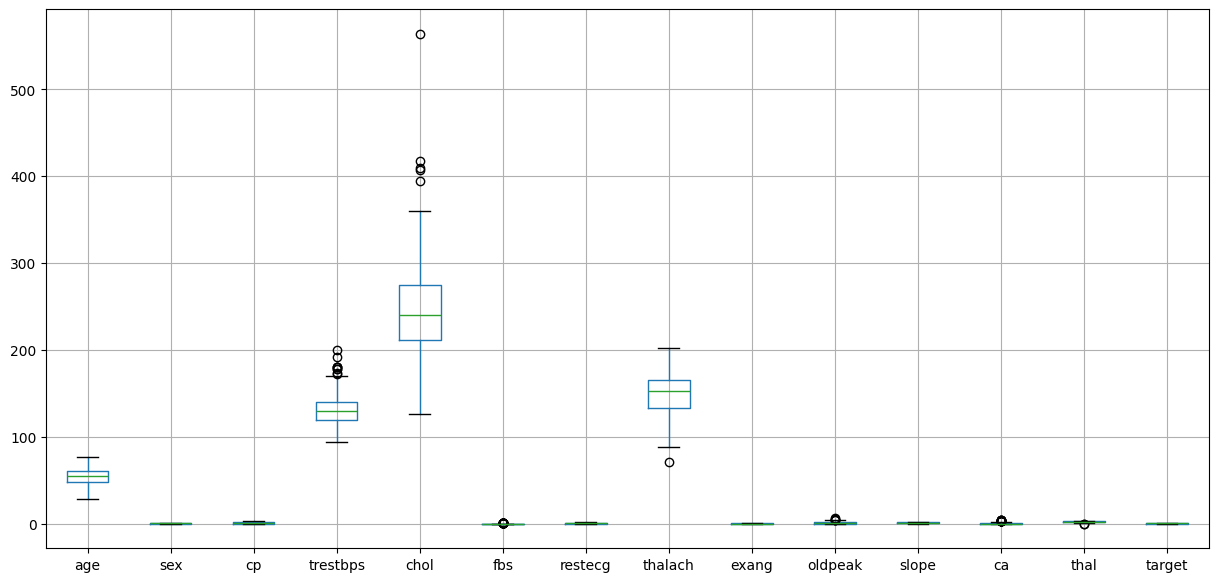

In [224]:
# Dealing with outliers
plt.figure(figsize=(15,7))
df.boxplot()
plt.show()

In [225]:
print(data['fbs'].value_counts())
print(data['ca'].value_counts())

fbs
0    257
1     45
Name: count, dtype: int64
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64


<ul>
<li>Columns fbs and ca consist of outliers with meaningful insights. So we must careful of dealing with it</li>
<li>We can ignore outliers for fbs because 0 and 1 are allowed values in that column</li>
<li>For ca column we can have values ranging from 0 to 3. So other values can be eliminated i.e values having 4</li>
<li>The columns ['trestbps', 'chol', 'thalach','oldpeak', 'thal'] having continues values with outliers,So we are applying z_score method for identifying and removing outliers</li>
</ul>

In [226]:
# Removing those 4 outliers from the data
data = data[data['ca'] != 4]

In [227]:
# identifying and calculating no of outliers for each feature columns using zscore
outlier_cols = ['trestbps', 'chol', 'thalach','oldpeak', 'thal']
for col in outlier_cols:
    # calculating zscore of each column
    z_sc = zscore(data[col])
    threshold = 3
    outliers = (abs(z_sc) > threshold)
    no_outliers = sum(outliers)
    print(f'No of outliers for column {col} : {no_outliers}')

No of outliers for column trestbps : 2
No of outliers for column chol : 4
No of outliers for column thalach : 1
No of outliers for column oldpeak : 2
No of outliers for column thal : 2


In [228]:
# Removing all outliers 
for col in outlier_cols: 
    z_score = np.abs(zscore(data[col]))
    threshold = 3 
    outliers_col = (z_score > threshold)
    data[col] = data[~outliers_col][col]

In [229]:
# Checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    2
chol        4
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     2
slope       0
ca          0
thal        2
target      0
dtype: int64

In [230]:
# Imputing the null values by its corresponding column mean
for col in outlier_cols:
    data[col].fillna(data[col].mean(),inplace=True)

<h3> Exploratory Data Analysis and Feature Engineering</h3>

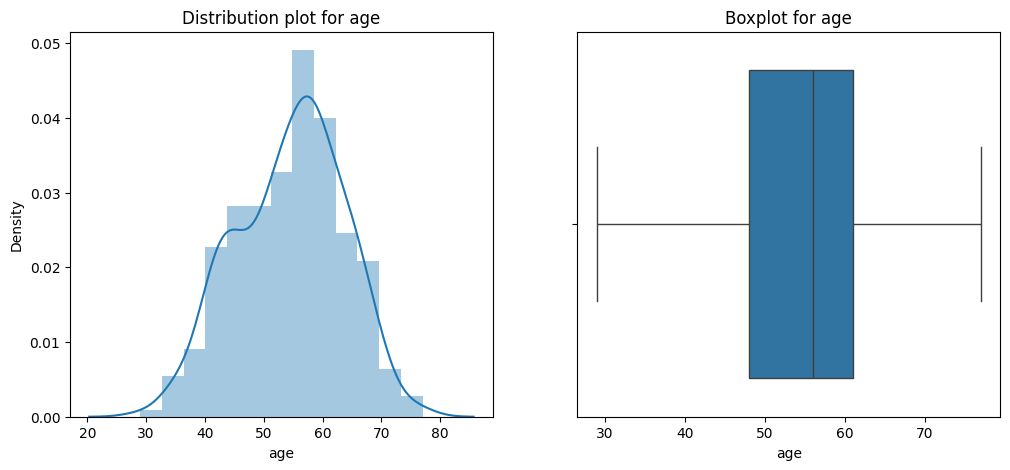

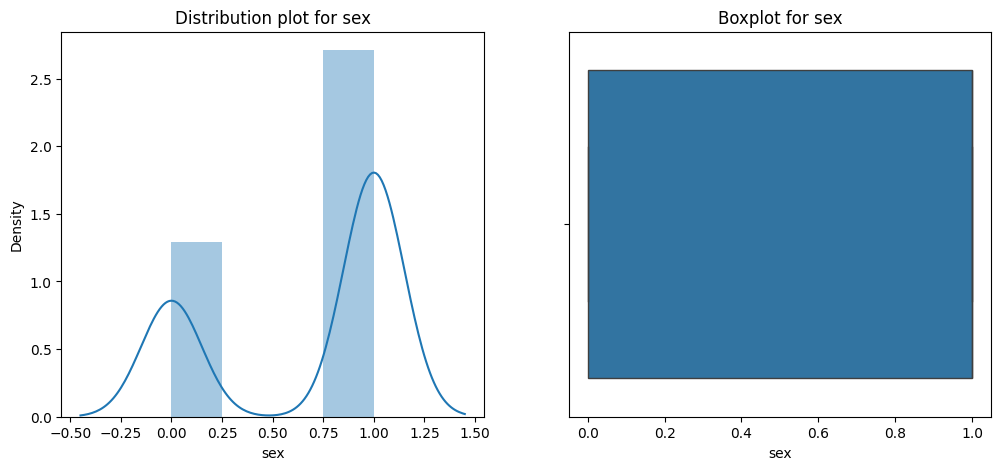

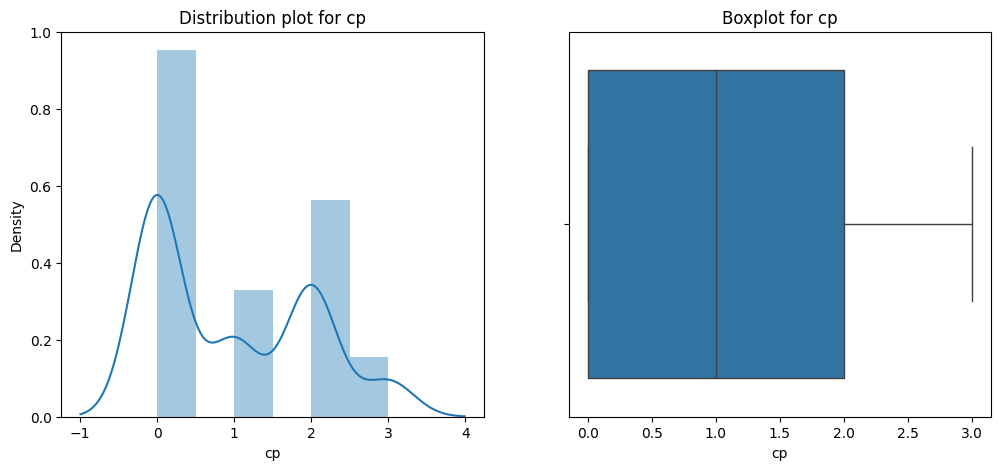

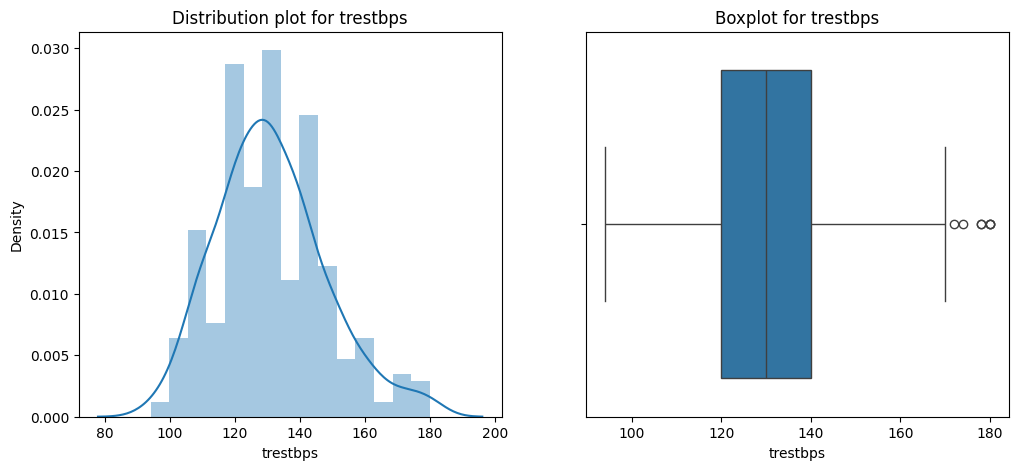

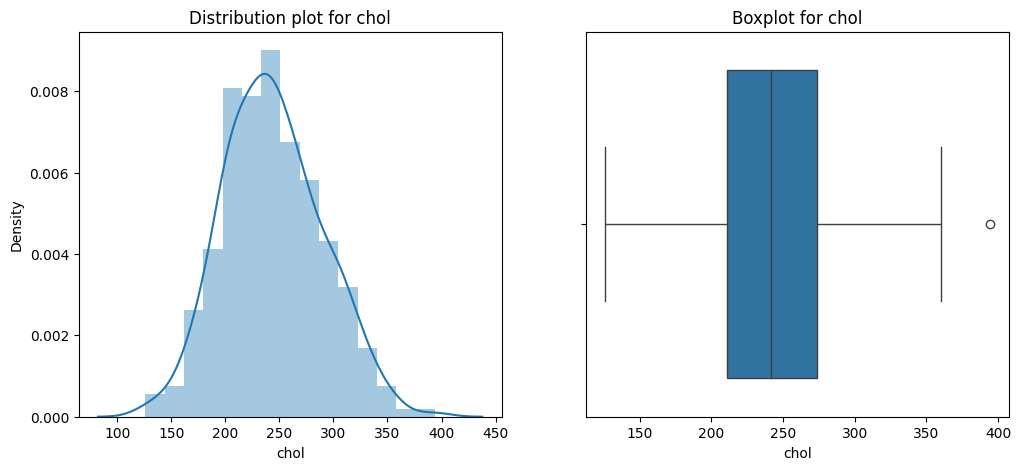

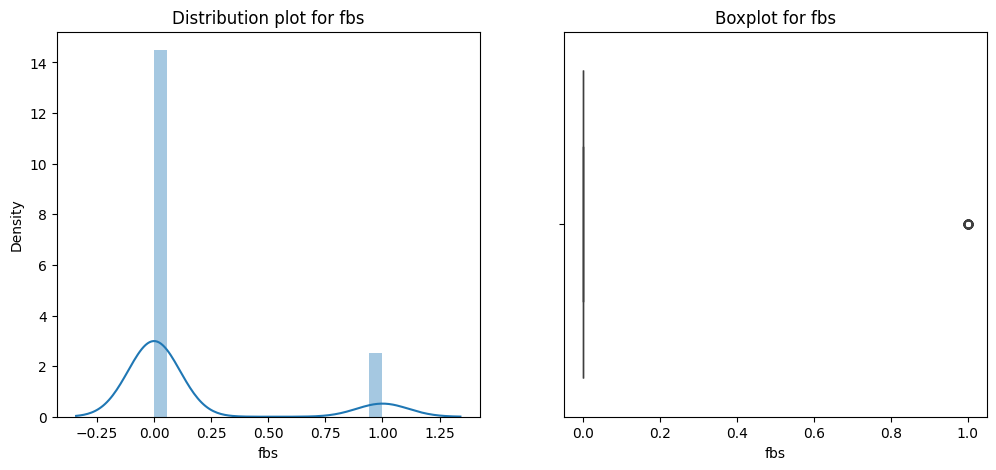

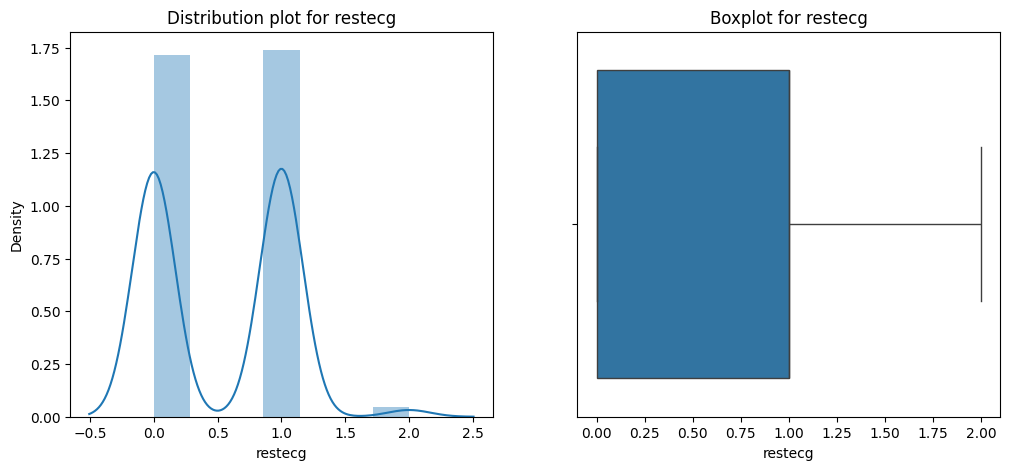

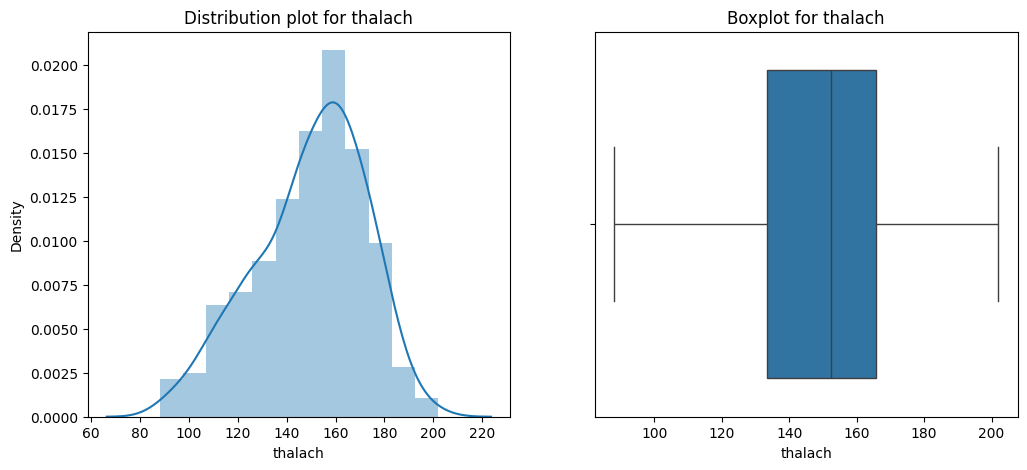

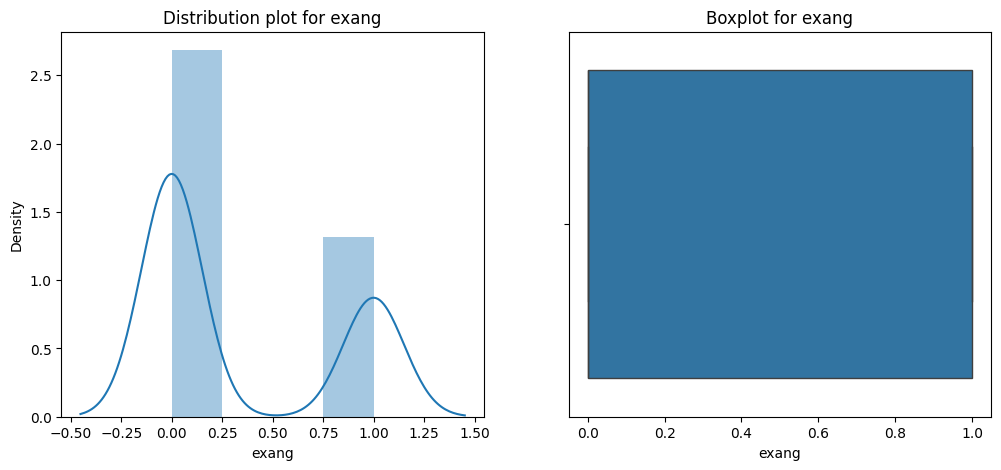

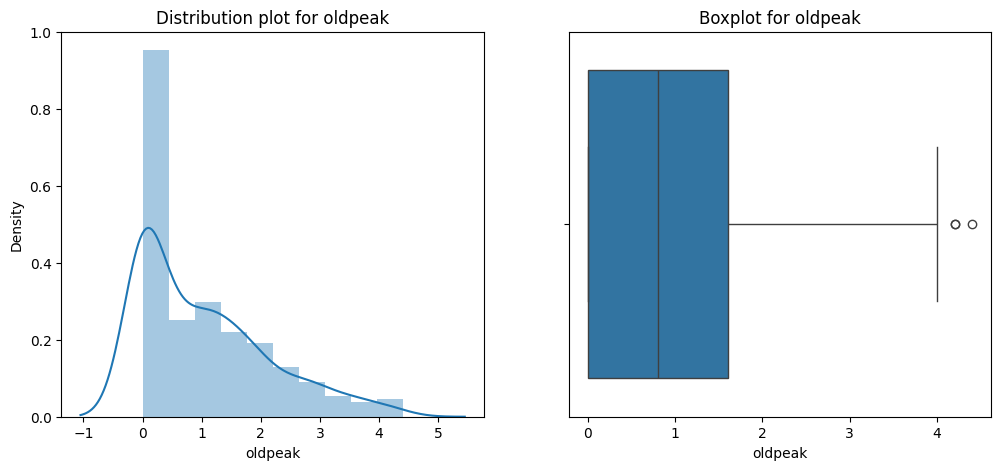

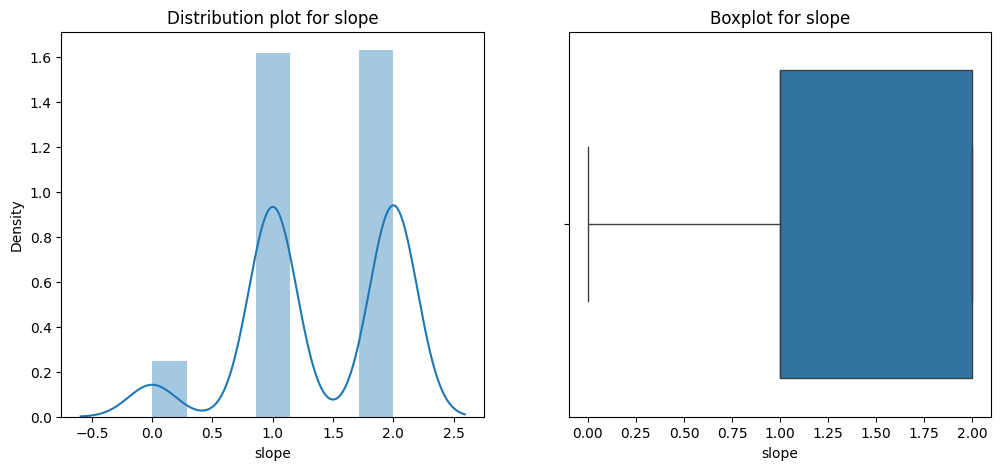

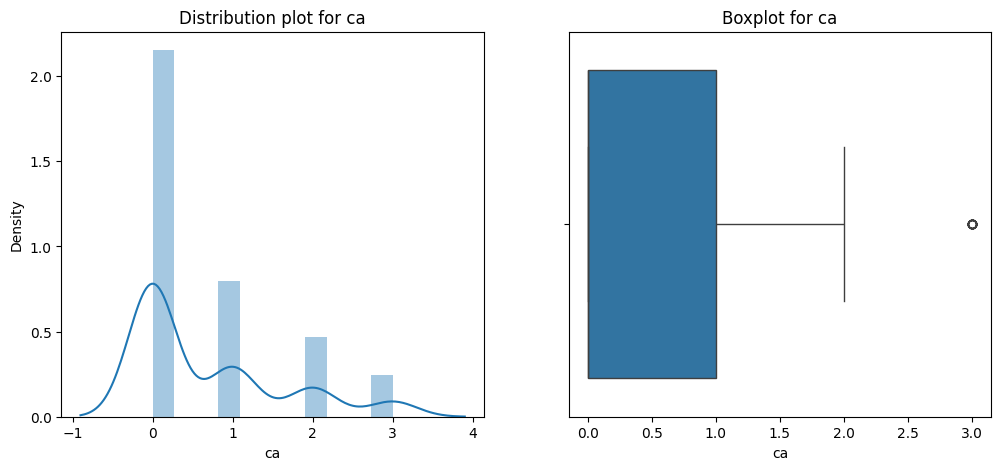

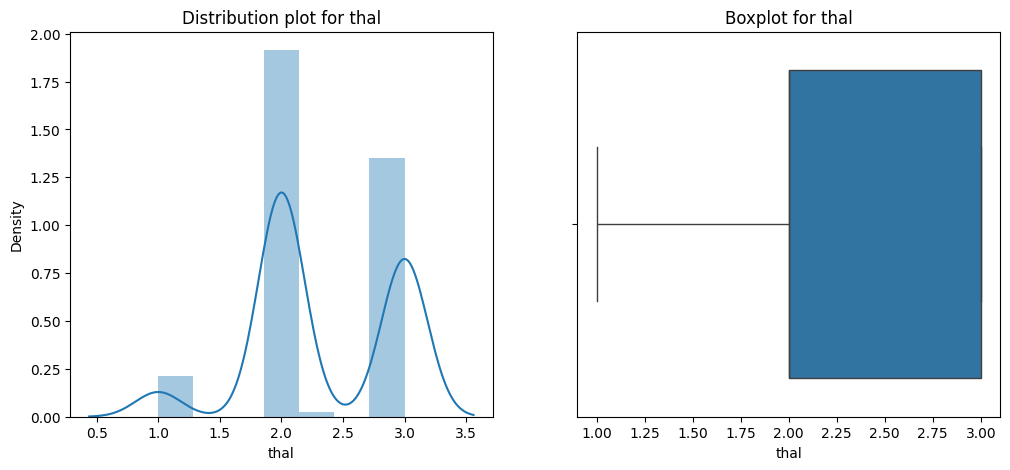

In [231]:
#Univariate analysis of numerical data columns
# Plotting distribution plot and boxplot for feature columns
num_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
for col in num_cols:
    fig,axes = plt.subplots(1,2,figsize=(12,5))
    # distribution plot
    sns.distplot(x=data[col],ax=axes[0],axlabel=col)
    axes[0].set_title(f'Distribution plot for {col}')
    # boxplot
    sns.boxplot(data=data,x=col,ax=axes[1])
    axes[1].set_title(f'Boxplot for {col}')
    plt.show()

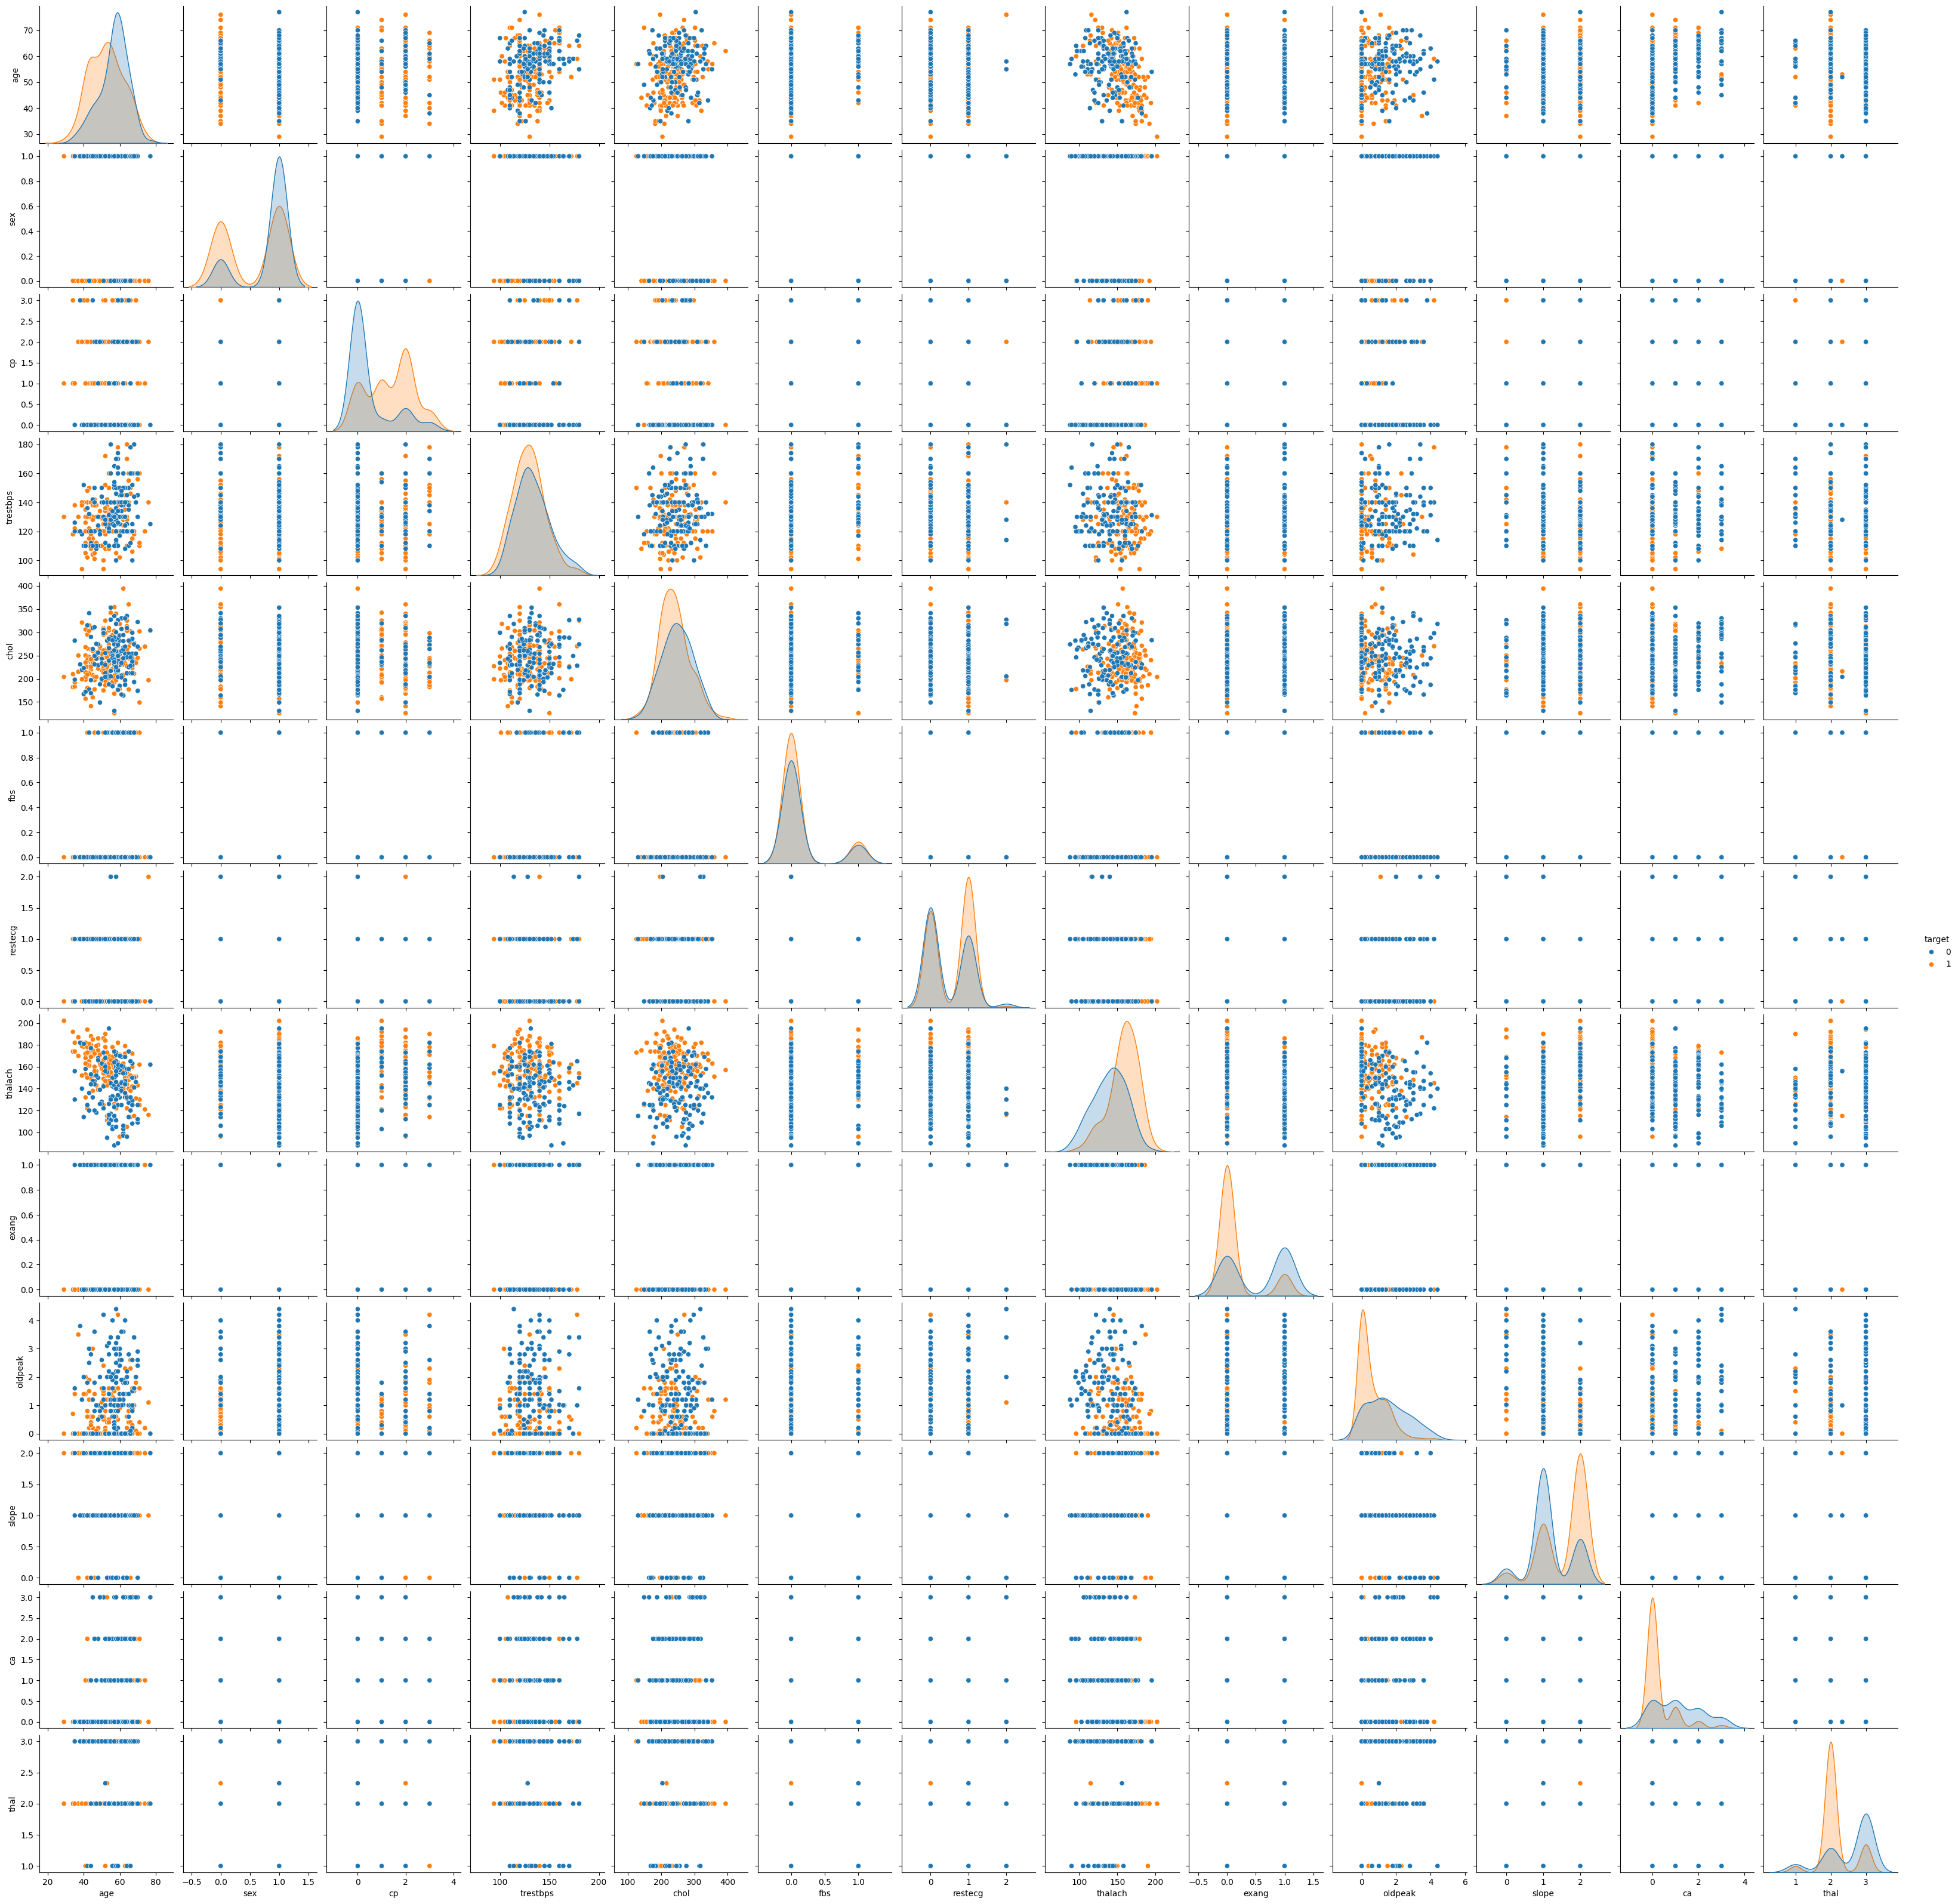

In [232]:
# Pairplot for bivariate analysis of data
sns.pairplot(data, hue='target')
plt.show()

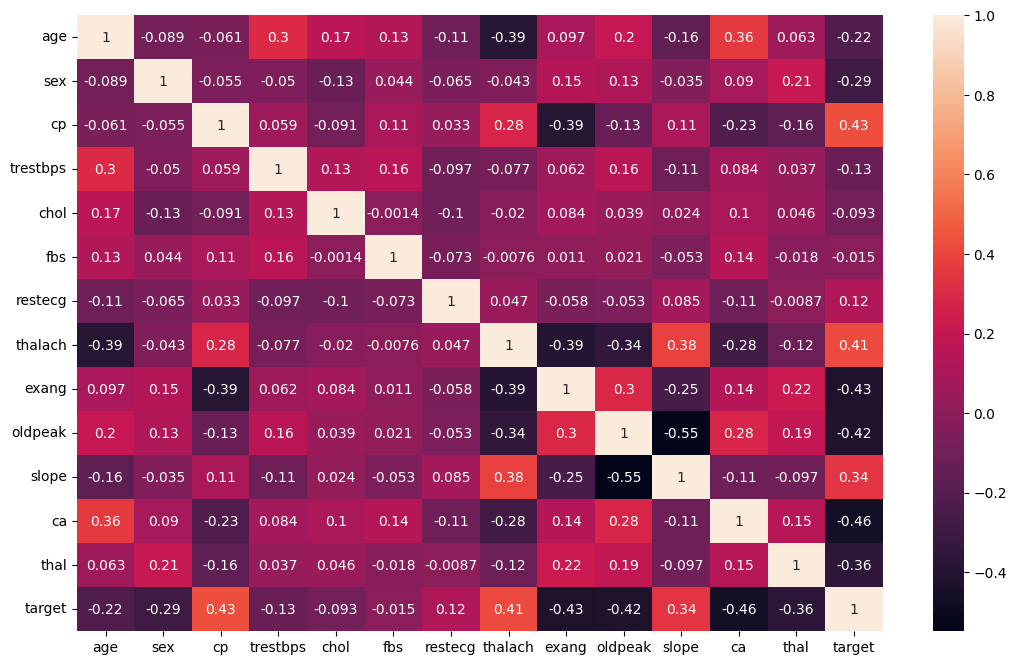

In [233]:
# Plotting correlation matrix of entire data
plt.figure(figsize=(13,8))
corr_matrix = data.corr()
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

<ul>
<li>From above pairplot and heatmap there exist no columns with high correlation. So no need to remove any highly correlated columns</li>
</ul>

In [248]:
data['target'].value_counts()

target
1    161
0    137
Name: count, dtype: int64

In [234]:
df_final = data.copy()

<h3> Model Building and Performance Analysis</h3>

In [236]:
# Separate features and target variable
X = df_final.drop('target', axis=1)
y = df_final['target']

<h4>Scaling feature columns</h4>

In [237]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak',  'thal']
categorical_columns = ['sex','cp', 'fbs', 'restecg',
       'exang','slope', 'ca']
sc = StandardScaler()

# for categorical columns
X = pd.get_dummies(data=X,columns=categorical_columns,dtype='int',drop_first=True)
# for numerical columns
X[numeric_columns] = sc.fit_transform(X[numeric_columns])

In [238]:

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Algorithms used for models
<ul>
<li>Naive Bayes Classifier</li>
<li>Decision Tree</li>
</ul>

In [239]:
# Build Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
nb_predictions = nb_model.predict(X_test)

In [240]:
# Calculating the performance parameters for Naive bayes model
#accuracy score
acc_score_naive =  accuracy_score(y_test, nb_predictions)
#confusion metrix
conf_metrix_naive = confusion_matrix(y_test, nb_predictions)
# roc score
roc_score_naive = roc_auc_score(y_test, nb_predictions)
# recall score
recall_score_naive = recall_score(y_test, nb_predictions)
# precision score
precision_score_naive  = precision_score(y_test, nb_predictions)
# f1 score
f1_score_naive = f1_score(y_test, nb_predictions)

In [241]:
# Printing the above results
print("Naive Bayes Model:")
print("Accuracy:",acc_score_naive)
print("Confusion Matrix:\n", conf_metrix_naive)
print("ROC Score:",roc_score_naive )
print("Recall:", recall_score_naive)
print("Precision:", precision_score_naive)
print("F1 Score:", f1_score_naive)

Naive Bayes Model:
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[16  7]
 [ 1 36]]
ROC Score: 0.8343125734430082
Recall: 0.972972972972973
Precision: 0.8372093023255814
F1 Score: 0.9


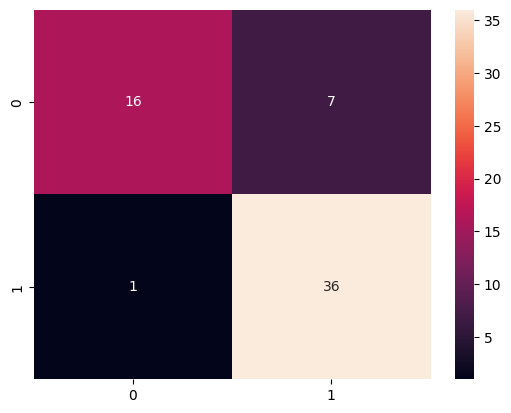

In [242]:
# heatmap for confusion metrix
sns.heatmap(data=conf_metrix_naive,annot=True)
plt.show()

In [243]:
# Build Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

In [244]:
# calcualting performance parametes
acc_score_tree = accuracy_score(y_test, dt_predictions)
conf_metrix_tree  = confusion_matrix(y_test, dt_predictions)
roc_score_tree = roc_auc_score(y_test, dt_predictions)
recall_score_tree  = recall_score(y_test, dt_predictions)
precision_score_tree  = precision_score(y_test, dt_predictions)
f1_score_tree = f1_score(y_test, dt_predictions)

In [245]:
# Printing above calculated values
print("\nDecision Tree Model:")
print("Accuracy:", acc_score_tree)
print("Confusion Matrix:\n", conf_metrix_tree)
print("ROC Score:", roc_score_tree)
print("Recall:", recall_score_tree)
print("Precision:", precision_score_tree)
print("F1 Score:",f1_score_tree )


Decision Tree Model:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[14  9]
 [11 26]]
ROC Score: 0.6556991774383079
Recall: 0.7027027027027027
Precision: 0.7428571428571429
F1 Score: 0.7222222222222223


In [246]:
# Perform hyperparameter tuning for Decision Tree
param_grid = {'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set using the tuned model
best_dt_predictions = best_dt_model.predict(X_test)

In [247]:
# Evaluate tuned Decision Tree model
print("\nTuned Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, best_dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_dt_predictions))
print("ROC Score:", roc_auc_score(y_test, best_dt_predictions))
print("Recall:", recall_score(y_test, best_dt_predictions))
print("Precision:", precision_score(y_test, best_dt_predictions))
print("F1 Score:", f1_score(y_test, best_dt_predictions))


Tuned Decision Tree Model:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[14  9]
 [11 26]]
ROC Score: 0.6556991774383079
Recall: 0.7027027027027027
Precision: 0.7428571428571429
F1 Score: 0.7222222222222223


<h4> Feature engineering for improving performance of the model</h4>

In [249]:
# Feature engineering for performance improvement
# Select top k features using ANOVA F-statistic
k_best = 5  # You can adjust this parameter based on your analysis
feature_selector = SelectKBest(f_classif, k=k_best)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Retrain the model on the selected features
best_dt_model.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features
best_dt_predictions_selected = best_dt_model.predict(X_test_selected)


In [250]:
# Evaluate the model with selected features
print("\nTuned Decision Tree Model with Feature Selection:")
print("Accuracy:", accuracy_score(y_test, best_dt_predictions_selected))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_dt_predictions_selected))
print("ROC Score:", roc_auc_score(y_test, best_dt_predictions_selected))
print("Recall:", recall_score(y_test, best_dt_predictions_selected))
print("Precision:", precision_score(y_test, best_dt_predictions_selected))
print("F1 Score:", f1_score(y_test, best_dt_predictions_selected))


Tuned Decision Tree Model with Feature Selection:
Accuracy: 0.7
Confusion Matrix:
 [[15  8]
 [10 27]]
ROC Score: 0.6909518213866039
Recall: 0.7297297297297297
Precision: 0.7714285714285715
F1 Score: 0.75


In [255]:
# Generate classification report for Naive Bayes
print(100 * '-')
print("Classification Report for Naive Bayes:")
print(100 * '-')
print(classification_report(y_test, nb_predictions))

# Generate classification report for Decision Tree
print(100 * '-')
print("\nClassification Report for Decision Tree:")
print(100 * '-')
print(classification_report(y_test, best_dt_predictions_selected))

----------------------------------------------------------------------------------------------------
Classification Report for Naive Bayes:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.84      0.97      0.90        37

    accuracy                           0.87        60
   macro avg       0.89      0.83      0.85        60
weighted avg       0.88      0.87      0.86        60

----------------------------------------------------------------------------------------------------

Classification Report for Decision Tree:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.65      0.63        23
           1       0.77      0.73      0.75        37

    accuracy            

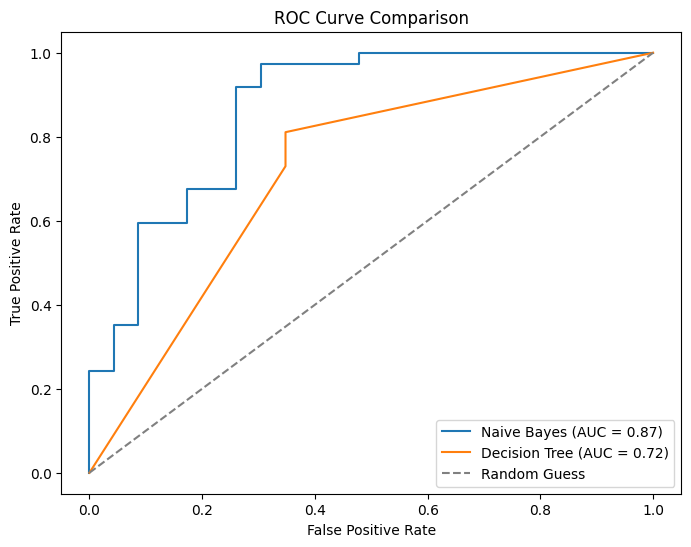

In [253]:
# Plotting roc curve 

# Compute ROC curve for Naive Bayes
nb_probs = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Compute ROC curve for Decision Tree
dt_probs = best_dt_model.predict_proba(X_test_selected)[:, 1]  # Use the selected features
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Inferences
<ul>
<li> While compairing both of the models, Naive bayes model is having high accuracy than decision tree </li>
<li> Performance of Decision tree model is slightly enhanced by using hyper parameter tuning and feature engineering </li>
<li> We can also try with different technique like cross validation,other best feature selecting methods for improving our model performance</li>
</ul>

<h4> Thank You !!</h4>